# ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА

### HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

## В процессе своего анализа вы должны:

1. Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.
2. А также ответить на ключевые вопросы HR-агентства:
- Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
- Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
- Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
- Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?
- Если вы найдёте в данных интересные закономерности, также отметьте их в своём анализе.

Продемонстрируйте использование разных тестов для проверки статистической значимости сделанных выводов:

- тесты для количественного признака:
- для одной выборки;
- для двух выборок;
- для нескольких выборок;
- тест для категориальных признаков.

Результатом вашей работы должен стать ноутбук (IPYNB-файл) с кодом для исследования, а также с выводами и рассуждениями, полученными на основе разведывательного анализа.

#### Описание

- work_year - Год, в котором была выплачена зарплата.
- experience_level - Опыт работы на этой должности в течение года со следующими возможными значениями:
* *EN* — Entry-level/Junior; 
* *MI* — Mid-level/Intermediate;
* *SE* — Senior-level/Expert;
* *EX* —  Executive-level/Director.

- employment_type - Тип трудоустройства для этой роли:
* *PT* — неполный рабочий день;
* *FT* — полный рабочий день;
* *CT* — контракт;
* *FL* — фриланс

- job_title - Роль, в которой соискатель работал в течение года.
- salary - Общая выплаченная валовая сумма заработной платы.
- salary_currency - Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.
- salary_in_usd - Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com).
- employee_residence - Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.

- remote_ratio - Общий объём работы, выполняемой удалённо. Возможные значения:
* *0* — удалённой работы нет (менее 20 %);
* *50* — частично удалённая работа;
* *100* — полностью удалённая работа (более 80 %)

- company_location - Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166
- company_size - Среднее количество людей, работавших в компании в течение года:
* *S* — менее 50 сотрудников (небольшая компания);
* *M* — от 50 до 250 сотрудников (средняя компания);
* *L* — более 250 сотрудников (крупная компания).

## 1.Загрузка и обработка данных

### 1.1 Импорт необходимых библиотек и загрузка данных

In [47]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
sns.set_theme("notebook")
sns.set_palette("Set2")

In [9]:
data=pd.read_csv('data/ds_salaries.csv')
data.head(10) # смотрим первые 10 строк нашего сета

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [10]:
# устанавливаем уровень альа значимости
alpha=0.05
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


### 1.2 Проверка данных на пустые значения, дубликаты и корректность типов данных

In [11]:
data.info() # смотрим краткое инфо по сэту

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [12]:
# проверяем данные на дубликаты
dubl=data[data.duplicated()].shape[0]
print('Количество дубликатов в сете:', dubl)

Количество дубликатов в сете: 0


Вывод: в датасете 607 записей. Пустые значения и дубликаты отсутствуют. Корректность данных тоже в норме, отклонений не выявил, на первый взгляд каждому из признаков соотвествует свой тип данных.

### 1.3 Неинформационные столбцы

Вывод: судя по всему информация из признаков "salary" и "salary_currency" абсолютно неинформативна, так как есть признак "salary_in_usd", который сводит их к общему знаменателю.
Так же 1-ый столбец не несет никакой информации

In [13]:
# дропнем неинформационные признаки
data.drop(data.columns[[0,5,6]], axis=1, inplace=True)
data.head(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


### 1.4 Классификация на категориальные и числовые признаки

In [14]:
# Для классификации признаков решил посмотреть на кол-во уникальных значений в признаках
year=data['work_year'].unique().__len__()
print("Кол-во уникальных значений в признаке 'год выплаты з/п'=", year)
job=data['job_title'].unique().__len__()
print("Кол-во уникальных значений в признаке 'роль, в которой соискатель работал в течении года'=", job)
country=data['employee_residence'].unique().__len__()
print("Кол-во уникальных значений в признаке 'основная страна проживания сотрудника'=", country)
company_location=data['company_location'].unique().__len__()
print("Кол-во уникальных значений в признаке 'страна глаавного офиса работодателя'=", company_location)

Кол-во уникальных значений в признаке 'год выплаты з/п'= 3
Кол-во уникальных значений в признаке 'роль, в которой соискатель работал в течении года'= 50
Кол-во уникальных значений в признаке 'основная страна проживания сотрудника'= 57
Кол-во уникальных значений в признаке 'страна глаавного офиса работодателя'= 50


Вывод: на самом деле можно было не производить выше описанную процедуру, а обратить внимание на инфо о нашем сэте.

К числовым признакам относятся:
- *Salary*, но я не буду им пользоваться, считаю что он не информативен
- *Salary_currency*, так же считаю его не пригодным для дальнейшей работы
- *Salary_in_usd* вроде как основной признак, вокруг которого будет строится анализ

К категориальным признакам относятся:

Все оставшиеся признаки. Прнадлежность признаков *experience_level, employment_type, remote_ratio, company_size* в принципе проглядывалась в описании признаков к заданию(в описании признаков уже указана классификация значений на группы). Признаки *work_year, job_title, employee_residence, company_location* показали свою принадлежность проверкой проделанной выше

### 1.5 Основные статистические характеристики для признаков

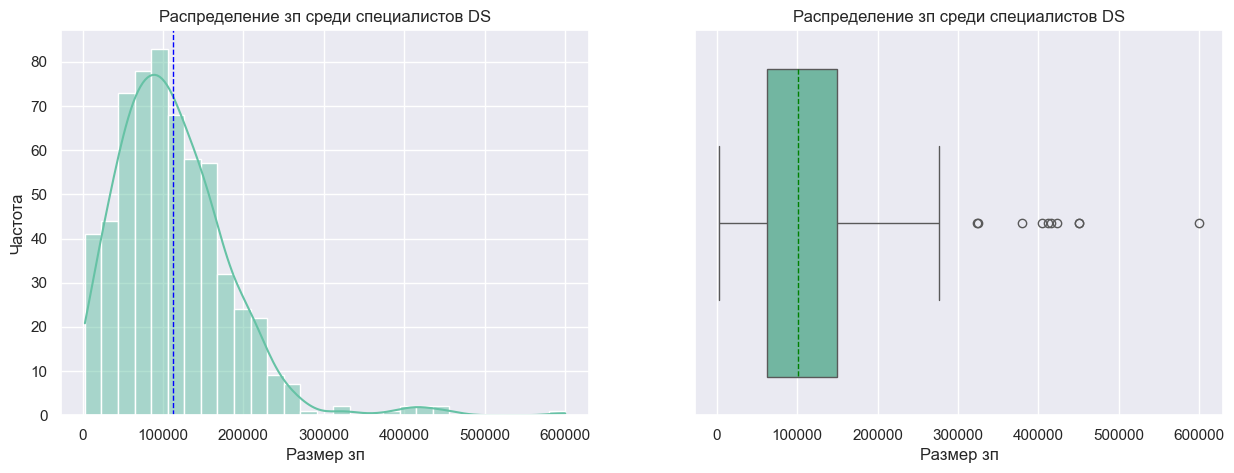

In [15]:
# Смотрим основной признак - зп в USD
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер зп', ylabel='Частота')
axes[0].set_title('Распределение зп среди специалистов DS')
axes[0].axvline(data['salary_in_usd'].mean(), color='blue', linestyle='--', linewidth=1)

sns.boxplot(data['salary_in_usd'], ax=axes[1], orient='h', medianprops={"color": "green", "linestyle": "--"})
axes[1].set(xlabel='Размер зп')
axes[1].set_title('Распределение зп среди специалистов DS')
plt.show()

In [16]:
money_agg=data['salary_in_usd'].describe().round(1).to_frame()
money_agg.columns=['Размер зп специалистов DS']
money_agg

,Размер зп специалистов DS
count,607.0
mean,112297.9
std,70957.3
min,2859.0
25%,62726.0
50%,101570.0
75%,150000.0
max,600000.0


Вывод: распределение отличное от нормального, так же присутствуют выбросы

### Смотрим признак "Год, в котором была выплачена зарплата"(work_year)

In [154]:
# посмотрим на кол-во записей зафиксированный по каждому году
data['work_year'].value_counts()

work_year
2022    318
2021    217
2020     72
Name: count, dtype: int64

Text(0, 0.5, 'Количество')

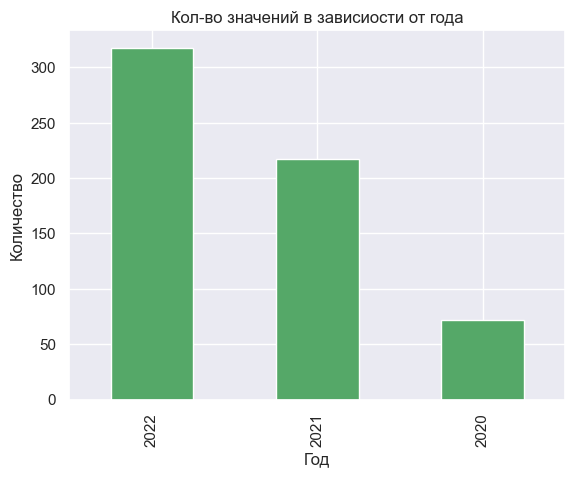

In [160]:
# для лучшей восприимчивости отобразим этот признак визуально
data['work_year'].value_counts().plot.bar(color="g")
plt.title("Кол-во значений в зависиости от года")
plt.xlabel("Год")
plt.ylabel("Количество")

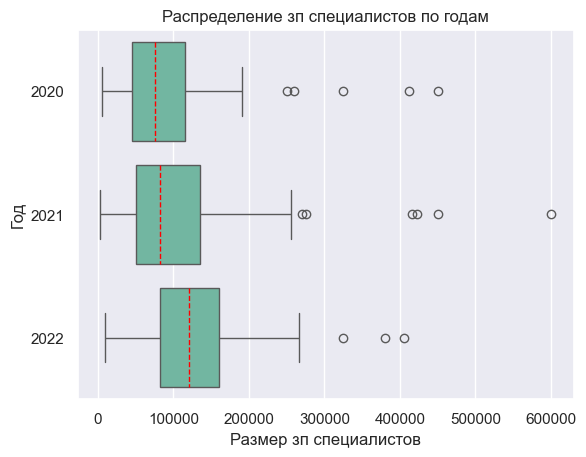

In [17]:
# Решил посмотреть на динамику зп с течением времени
ax = sns.boxplot(data, x='salary_in_usd', y='work_year', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер зп специалистов', ylabel='Год')
plt.title('Распределение зп специалистов по годам')
plt.show()

Предварительный вывод по признаку: кол-во значений растет в динамике от года к году, не понятно есть ли смысл включать значения 2020 года(72 значения), по причине их невысокого количества относительно 2022 году(318 значений)

# *ATTENTION*

In [18]:
data_work_year_agg=data.groupby('work_year')['salary_in_usd'].describe().round(1)
print('Распределение зп специалистов в зависимости от года')
data_work_year_agg

Распределение зп специалистов в зависимости от года


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,72.0,95813.0,82831.8,5707.0,45724.5,75544.0,115526.0,450000.0
2021,217.0,99853.8,80225.1,2859.0,50000.0,82528.0,135000.0,600000.0
2022,318.0,124522.0,58183.6,10000.0,81666.0,120000.0,160000.0,405000.0


Вывод: предварителельно видна положительная динамика по росту зп у специалистов, что касается признака *work_year* - наблюдается рост кол-ва специалистов с течением времени. так же наблюдается стабилизация отклонений в зп по 2022 году в отличии от предыдущих годов, скорее всего это связано со снижением кол-ва выбросов

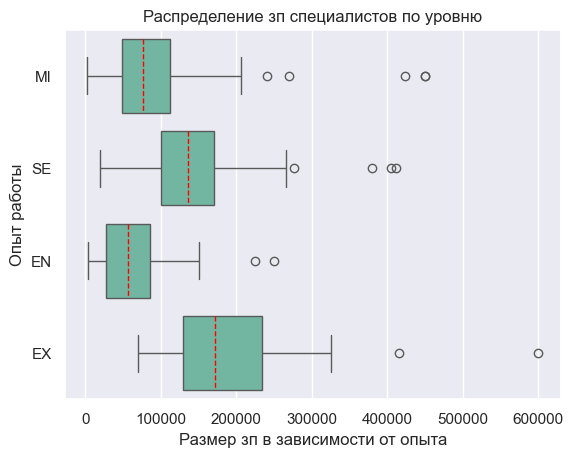

In [19]:
# experience_level
ax = sns.boxplot(data, x='salary_in_usd', y='experience_level', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер зп в зависимости от опыта', ylabel='Опыт работы')
plt.title('Распределение зп специалистов по уровню')
plt.show()

In [20]:
data_experience_level_agg=data.groupby('experience_level')['salary_in_usd'].describe().round(1)
print('Распределение зп специалистов в зависимости от опыта')
data_experience_level_agg

Распределение зп специалистов в зависимости от опыта


,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,88.0,61643.3,44395.5,4000.0,27505.0,56500.0,85425.8,250000.0
EX,26.0,199392.0,117071.3,69741.0,130006.5,171437.5,233750.0,600000.0
MI,213.0,87996.1,63901.1,2859.0,48000.0,76940.0,112000.0,450000.0
SE,280.0,138617.3,57692.0,18907.0,100000.0,135500.0,170000.0,412000.0


Вывод: выбросы присутствуют по всем категориями. Предварительно видна очевидная картина по уровню зп с точки зрения иерархии IT специалистов(чем выше уровень занимающей должности, тем выше зп). 

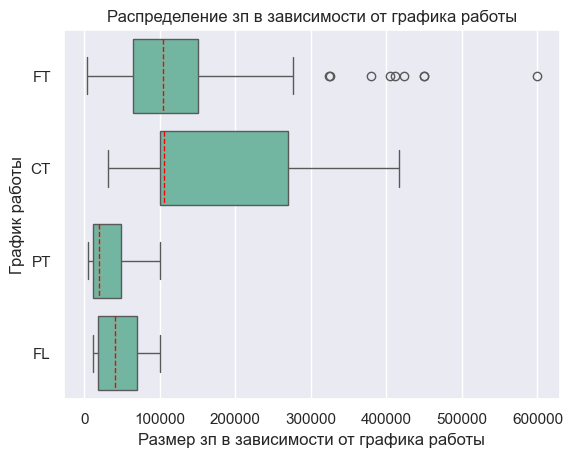

In [21]:
# employment_type

ax = sns.boxplot(data, x='salary_in_usd', y='employment_type', orient='h', medianprops={"color": "red", "linestyle": "--"})
ax.set(xlabel='Размер зп в зависимости от графика работы', ylabel='График работы')
plt.title('Распределение зп в зависимости от графика работы')
plt.show()

In [22]:
data_employement_type_agg=data.groupby('employment_type')['salary_in_usd'].describe().round(1)
print('Распределение зп в зависимости от графика работы')
data_employement_type_agg

Распределение зп в зависимости от графика работы


,count,mean,std,min,25%,50%,75%,max
employment_type,,,,,,,,
CT,5.0,184575.0,156250.9,31875.0,100000.0,105000.0,270000.0,416000.0
FL,4.0,48000.0,40529.8,12000.0,18000.0,40000.0,70000.0,100000.0
FT,588.0,113468.1,69476.5,2859.0,64962.2,104196.5,150000.0,600000.0
PT,10.0,33070.5,31472.9,5409.0,12000.0,18817.5,48370.0,100000.0


Вывод: выбросы в зп присутствуют только по категории специалистов, которые сидят на FT-графике, так же видим подавляющее кол-во специалистов этой группы, относительно остальных из этой выборки. Так же наблюдается необычный разброс зп среди специалистов на графике CT, но это ни о чем не говорит, так как в данной выборке таких специалистов меннее 5%. 

**Предварительно предположу что специалистов с графиками CT, FL и PT сильно рассматривать нет необходимости в виду их небольшого кол-ва**

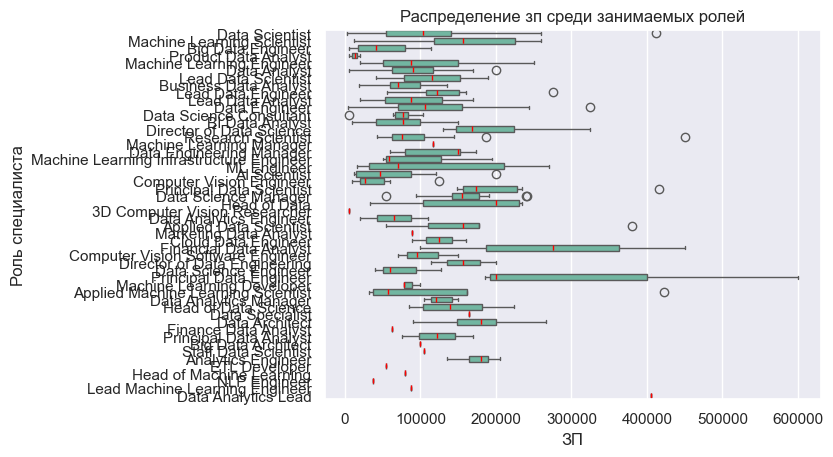

In [23]:
# job_title
ax=sns.boxplot(data, x='salary_in_usd', y='job_title', orient='h', medianprops={"color": "red", "linestyle": "--"})
ax.set(xlabel="ЗП")
ax.set(ylabel="Роль специалиста")
plt.title("Распределение зп среди занимаемых ролей")
plt.show()

In [24]:
data_job_title_agg=data.groupby('job_title')['salary_in_usd'].describe().round(1)
print("Уровень зп в зависимости от роли")
data_job_title_agg.sort_values(by='count', ascending=False)

Уровень зп в зависимости от роли


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Scientist,143.0,108187.8,64112.8,2859.0,54724.0,103691.0,140850.0,412000.0
Data Engineer,132.0,112725.0,57629.1,4000.0,70039.5,105500.0,154600.0,324000.0
Data Analyst,97.0,92893.1,39961.1,6072.0,62000.0,90320.0,116150.0,200000.0
Machine Learning Engineer,41.0,104880.1,63218.6,20000.0,51064.0,87932.0,150000.0,250000.0
Research Scientist,16.0,109019.5,98542.8,42000.0,62176.0,76263.5,105000.0,450000.0
Data Science Manager,12.0,158328.5,52589.2,54094.0,142285.2,155750.0,178050.0,241000.0
Data Architect,11.0,177873.9,45714.7,90700.0,148900.0,180000.0,200669.5,266400.0
Big Data Engineer,8.0,51974.0,42954.8,5882.0,17557.0,41305.5,79756.0,114047.0
Machine Learning Scientist,8.0,158412.5,79514.7,12000.0,118075.0,156500.0,225000.0,260000.0


**Замечание:** очень много уникальных значений, невозможно смотреть всё это, соответственно придется взять топ-5, остальных убрать в "Other"

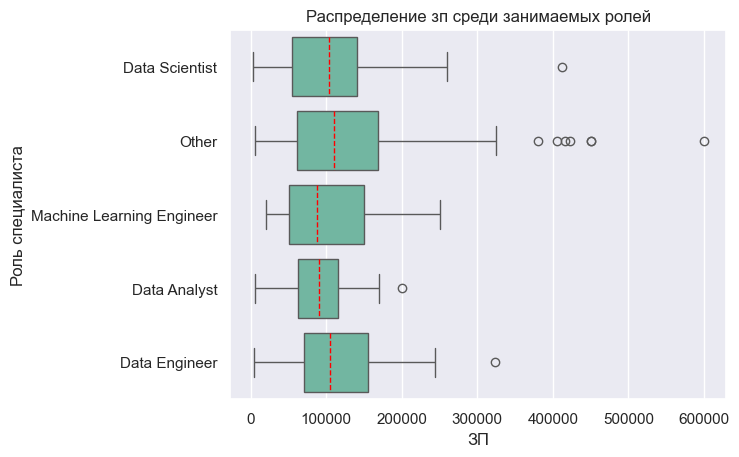

In [25]:
# попробуем сгрупировать значения признака и посмотрим ТОП-5, скорее всего это будет нагляднее
data_job_title_vision=data.copy()
job_title_list={'Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer'} # выделим топ-4 в список для функции
data_job_title_vision['job_title']=data['job_title'].apply(lambda x: x if x in job_title_list else 'Other')
# вот теперь можно и визуализировать данные и посмотреть распределение и выбросы
ax=sns.boxplot(data_job_title_vision, x='salary_in_usd', y='job_title', orient='h', medianprops={"color": "red", "linestyle": "--"})
ax.set(xlabel="ЗП")
ax.set(ylabel="Роль специалиста")
plt.title("Распределение зп среди занимаемых ролей")
plt.show()


In [26]:
# так же посмотрим на статистические данные, но перед этим решил привезти ЗП к знаменателю x/1000, сделал это потому что не понял как в дальнейшем в 
# тепловой карте настроить отображние ячеек для комфортного чтения =(((
data_job_title_vision_1k=data_job_title_vision.copy()
data_job_title_vision_1k['salary_in_usd']=data_job_title_vision['salary_in_usd'].apply(lambda x: x/1000)
# статистические данные по признаку job_title
data_job_title_vision_1k_agg=data_job_title_vision_1k.groupby('job_title')['salary_in_usd'].describe().round()
data_job_title_vision_1k_agg

,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Analyst,97.0,93.0,40.0,6.0,62.0,90.0,116.0,200.0
Data Engineer,132.0,113.0,58.0,4.0,70.0,106.0,155.0,324.0
Data Scientist,143.0,108.0,64.0,3.0,55.0,104.0,141.0,412.0
Machine Learning Engineer,41.0,105.0,63.0,20.0,51.0,88.0,150.0,250.0
Other,194.0,126.0,92.0,5.0,61.0,110.0,168.0,600.0


[Text(0.5, 44.249999999999986, 'Год'),
 Text(54.749999999999986, 0.5, 'Занимаемая должность/роль')]

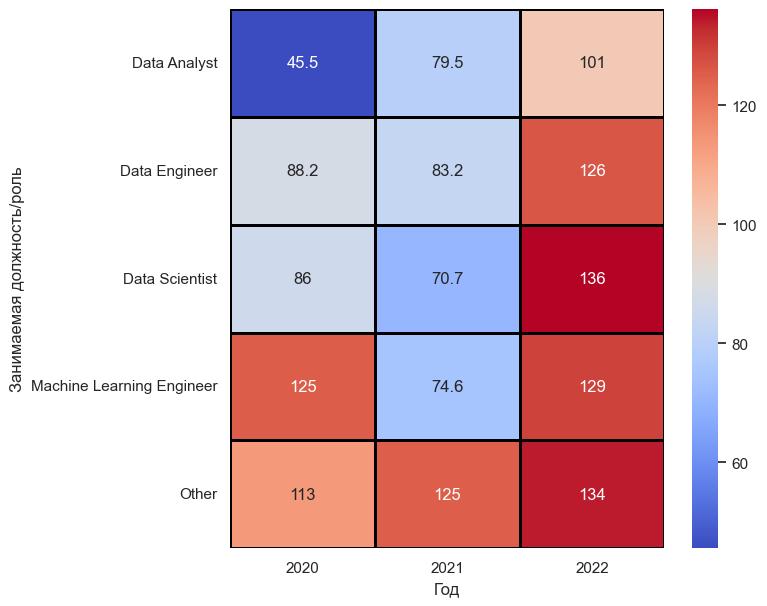

In [27]:
# построим тепловую карту, в голове держим что данные по зп у нас это 1х1000:
data_heatmap_job_title=pd.pivot_table(data_job_title_vision_1k, values='salary_in_usd', index='job_title', columns='work_year')
fig, ax=plt.subplots(figsize=(7,7))
ax=sns.heatmap(data_heatmap_job_title, linewidths=1, linecolor='black', annot=True, fmt="-.3g", cmap='coolwarm')
ax.set(xlabel="Год", ylabel="Занимаемая должность/роль")

вывод: по категорим присутствуют выбросы, предварительно видно что зп с течением времени растет практически по всем специальностям, группа Other выбивается относительно отсальных скорее всего из-за выбросов

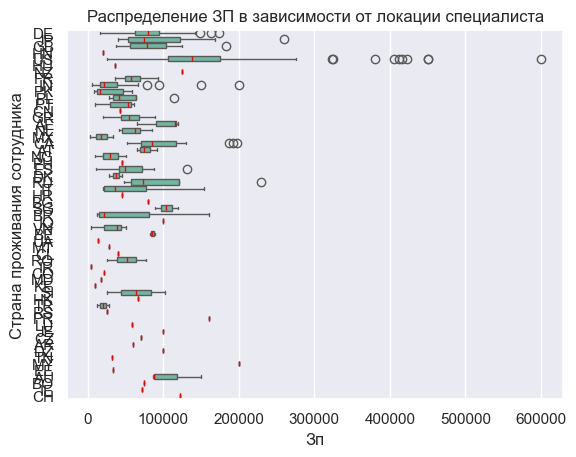

In [28]:
# employee_residence
ax=sns.boxplot(data, x='salary_in_usd', y='employee_residence', orient="h", medianprops={"color":"red", "linestyle":"--"})
ax.set(xlabel="Зп")
ax.set(ylabel="Страна проживания сотрудника")
ax.set_title("Распределение ЗП в зависимости от локации специалиста")
plt.show()

In [29]:
data_employee_residence_agg=data.groupby("employee_residence")["salary_in_usd"].describe().round(1)
print("Уровень зп в зависимости от локации специалиста")
data_employee_residence_agg.sort_values(by='count', ascending=False)

Уровень зп в зависимости от локации специалиста


,count,mean,std,min,25%,50%,75%,max
employee_residence,,,,,,,,
US,332.0,149194.1,68282.1,25000.0,105850.0,138475.0,175000.0,600000.0
GB,44.0,81403.2,29932.8,37300.0,55751.5,78526.0,103545.5,183228.0
IN,30.0,37322.3,43741.2,5409.0,16397.0,22124.0,38812.8,200000.0
CA,29.0,97085.3,39767.4,52000.0,70912.0,85000.0,117104.0,196979.0
DE,25.0,85552.6,39383.7,15966.0,62726.0,79197.0,94564.0,173762.0
FR,18.0,59886.6,15848.7,36643.0,49734.5,57920.0,69342.5,93427.0
ES,15.0,57593.4,28395.0,10354.0,41371.0,49461.0,71444.5,130800.0
GR,13.0,56331.2,20631.7,20000.0,43966.0,54957.0,68428.0,88654.0
JP,7.0,103537.7,81283.3,40000.0,52700.0,74000.0,122682.0,260000.0


**Замечание:** снова смотреть признак не возжно, выделим топ-6, остальных в "Other"

In [30]:
data_employee_residence_vision=data.copy()
employee_residence_list={"US","GB","IN","CA","DE"} # список для выделения топ-5
data_employee_residence_vision["employee_residence"]=data["employee_residence"].apply(lambda x: x if x in employee_residence_list else 'Other')
data_employee_residence_vision

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,Other,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,Other,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M


In [31]:
# ну и снова приведем зп к знаменателю x/1000
data_employee_residence_vision_1k=data_employee_residence_vision.copy()
data_employee_residence_vision_1k['salary_in_usd']=data_employee_residence_vision["salary_in_usd"].apply(lambda x:x/1000)
data_employee_residence_vision_1k
# смотрим что получилось далее

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79.833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260.000,Other,0,JP,S
2,2020,SE,FT,Big Data Engineer,109.024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20.000,Other,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150.000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154.000,US,100,US,M
603,2022,SE,FT,Data Engineer,126.000,US,100,US,M
604,2022,SE,FT,Data Analyst,129.000,US,0,US,M
605,2022,SE,FT,Data Analyst,150.000,US,100,US,M


In [32]:
data_employee_residence_vision_1k_agg=data_employee_residence_vision_1k.groupby("employee_residence")["salary_in_usd"].describe().round(1)
print("Зп в зависимости от локации сотрудника")
data_employee_residence_vision_1k_agg

Зп в зависимости от локации сотрудника


,count,mean,std,min,25%,50%,75%,max
employee_residence,,,,,,,,
CA,29.0,97.1,39.8,52.0,70.9,85.0,117.1,197.0
DE,25.0,85.6,39.4,16.0,62.7,79.2,94.6,173.8
GB,44.0,81.4,29.9,37.3,55.8,78.5,103.5,183.2
IN,30.0,37.3,43.7,5.4,16.4,22.1,38.8,200.0
Other,147.0,61.1,42.1,2.9,34.6,53.2,77.2,260.0
US,332.0,149.2,68.3,25.0,105.8,138.5,175.0,600.0


[Text(0.5, 44.249999999999986, 'Год'),
 Text(54.75, 0.5, 'Локация сотрудника/страна проживания')]

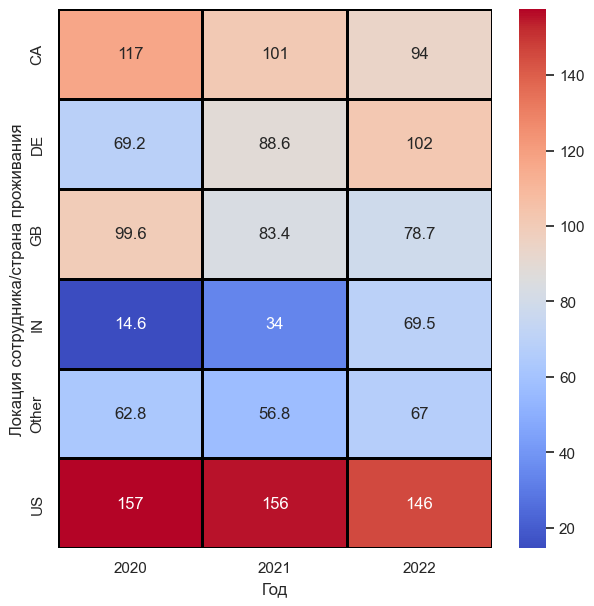

In [33]:
# телловая карта для признака по проживанию сотрудника, ЗП уже приведена к знаменателю x/1000
data_heatmap_employee_residence=pd.pivot_table(data_employee_residence_vision_1k, values='salary_in_usd', index='employee_residence', columns='work_year')
fig, ax=plt.subplots(figsize=(7,7))
ax=sns.heatmap(data_heatmap_employee_residence, linewidths=1, linecolor='black', annot=True, fmt="-.3g", cmap='coolwarm')
ax.set(xlabel="Год", ylabel="Локация сотрудника/страна проживания")

вывод: очень забавная картина - в странах-лидерах GB и CA, в период 2020-2022 наблюдается отрицательная динамика по зп, в то время как в странах IN и DE зп плавно возросла(в IN она возрасла в арифметической прогрессии). В осатльном же мире по зп наблюдается почти "штиль" с течением времени. Это картина является диаметрально-противоположной предыдущей тепловой карте...что наталкивает на интересную мысль: **с течением времени зп в US и CA падала потому что появлялось всё больше специалистов с малым опытом работы, соответсвенно и зп у них была не высокая, поэтому это сильно влияло на общую статистику по зп в US**

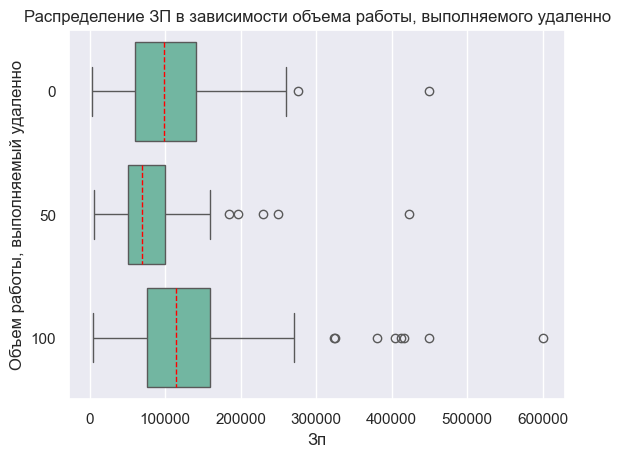

In [34]:
# remote_ratio
ax=sns.boxplot(data, x='salary_in_usd', y='remote_ratio', orient="h", medianprops={"color":"red", "linestyle":"--"})
ax.set(xlabel="Зп")
ax.set(ylabel="Объем работы, выполняемый удаленно")
ax.set_title("Распределение ЗП в зависимости объема работы, выполняемого удаленно")
plt.show()

In [35]:
data_remote_ratio_agg=data.groupby("remote_ratio")["salary_in_usd"].describe().round(1)
print("Уровень зп в зависимости от объема работ, выполняемого удаленно")
data_remote_ratio_agg.sort_values(by='count', ascending=False)

Уровень зп в зависимости от объема работ, выполняемого удаленно


,count,mean,std,min,25%,50%,75%,max
remote_ratio,,,,,,,,
100,381.0,122457.5,72710.8,4000.0,75774.0,115000.0,160000.0,600000.0
0,127.0,106354.6,67724.5,2859.0,60000.0,99000.0,140400.0,450000.0
50,99.0,80823.0,57353.1,5409.0,50355.0,69999.0,99851.5,423000.0


вывод: выбросы присутствуют по всем группам, самые выгодные условия по зп у специаистов из группы со 100% удаленкой, да и их подавлющее кол-во относительно всей выборки

In [36]:
# company_location
data_company_location=data.groupby("company_location")["salary_in_usd"].describe().round(1)
print("Зп в зависимости от локации компании")
data_company_location.sort_values(by="count", ascending=False)
# снова по привычке выделим топ-6 стран

Зп в зависимости от локации компании


,count,mean,std,min,25%,50%,75%,max
company_location,,,,,,,,
US,355.0,144055.3,69906.9,5679.0,100000.0,135000.0,170000.0,600000.0
GB,47.0,81583.0,29524.0,37300.0,57575.0,78526.0,103931.0,183228.0
CA,30.0,99823.7,46329.1,52000.0,69730.0,81895.5,117916.2,225000.0
DE,28.0,81887.2,39195.9,15966.0,58986.0,78015.0,90734.0,173762.0
IN,24.0,28581.8,22697.7,5409.0,16735.0,22124.0,32163.2,94665.0
FR,15.0,63970.7,28679.6,36643.0,48202.5,56738.0,69143.0,152000.0
ES,14.0,53060.1,21090.9,10354.0,40073.5,48371.5,68793.0,87932.0
GR,11.0,52293.1,19332.7,20000.0,42077.5,49461.0,60453.0,87932.0
JP,6.0,114127.3,83584.6,41689.0,66283.2,75682.0,145341.0,260000.0


In [37]:
data_company_location_vision=data.copy()
company_location_list={"US","DE","IN","CA","GB"} # список топ-стран
data_company_location_vision["company_location"]=data["company_location"].apply(lambda x: x if x in company_location_list else "Other")
data_company_location_vision

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,Other,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,Other,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M


In [38]:
# ну и снова приведем зп к знаменателю x/1000
data_company_location_vision_1k=data_company_location_vision.copy()
data_company_location_vision_1k['salary_in_usd']=data_company_location_vision["salary_in_usd"].apply(lambda x:x/1000)
data_company_location_vision_1k
# смотрим что получилось далее

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79.833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260.000,JP,0,Other,S
2,2020,SE,FT,Big Data Engineer,109.024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20.000,HN,0,Other,S
4,2020,SE,FT,Machine Learning Engineer,150.000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154.000,US,100,US,M
603,2022,SE,FT,Data Engineer,126.000,US,100,US,M
604,2022,SE,FT,Data Analyst,129.000,US,0,US,M
605,2022,SE,FT,Data Analyst,150.000,US,100,US,M


In [39]:
data_company_location_vision_1k_agg=data_company_location_vision_1k.groupby("company_location")["salary_in_usd"].describe().round(1)
print("Зп в зависимости от локации компании")
data_company_location_vision_1k_agg

Зп в зависимости от локации компании


,count,mean,std,min,25%,50%,75%,max
company_location,,,,,,,,
CA,30.0,99.8,46.3,52.0,69.7,81.9,117.9,225.0
DE,28.0,81.9,39.2,16.0,59.0,78.0,90.7,173.8
GB,47.0,81.6,29.5,37.3,57.6,78.5,103.9,183.2
IN,24.0,28.6,22.7,5.4,16.7,22.1,32.2,94.7
Other,123.0,58.7,41.6,2.9,33.0,50.2,75.5,260.0
US,355.0,144.1,69.9,5.7,100.0,135.0,170.0,600.0


[Text(0.5, 44.249999999999986, 'Год'),
 Text(54.75, 0.5, 'Локация компании/страна нахождения компании')]

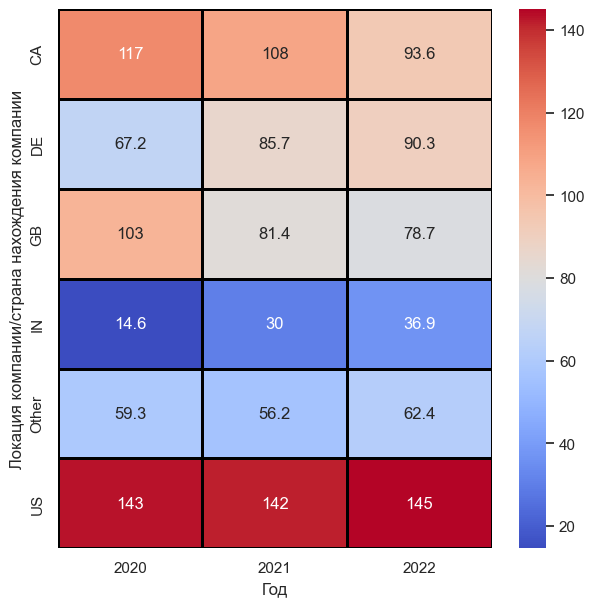

In [40]:
# телловая карта для признака по проживанию сотрудника, ЗП уже приведена к знаменателю x/1000
data_heatmap_company_location=pd.pivot_table(data_company_location_vision_1k, values='salary_in_usd', index='company_location', columns='work_year')
fig, ax=plt.subplots(figsize=(7,7))
ax=sns.heatmap(data_heatmap_company_location, linewidths=1, linecolor='black', annot=True, fmt="-.3g", cmap='coolwarm')
ax.set(xlabel="Год", ylabel="Локация компании/страна нахождения компании")

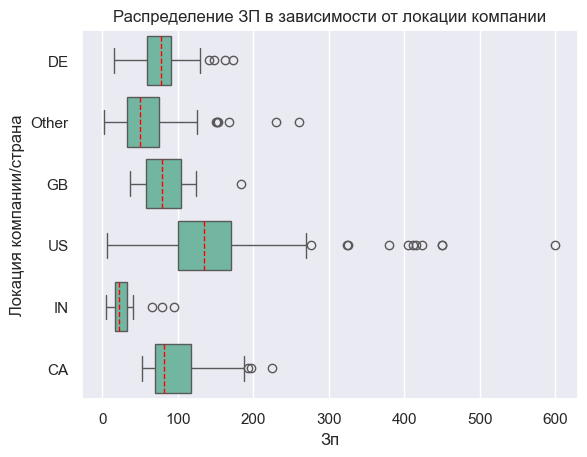

In [41]:
# глянем на распределение с учётом выделения топ-стран хозяек компаний
ax=sns.boxplot(data_company_location_vision_1k, x='salary_in_usd', y='company_location', orient="h", medianprops={"color":"red", "linestyle":"--"})
ax.set(xlabel="Зп")
ax.set(ylabel="Локация компании/страна")
ax.set_title("Распределение ЗП в зависимости от локации компании")
plt.show()

вывод: выбросы присутствуют по всем группам в данном признаке, опять же самые выгодные условия по зп у компаний, которые находятся в US. Что касается роста зп по странам - видна положительная динамика в IN и DE, чего не скажешь о CA и GB, там наблюдается отрицательная динамика по зп с течением времени. ***Теперь самое интересное: в US по данному признаку нет ни роста ни снижения ЗП, хотя по предыдущей тепловой карте (признак "страна проживания сотрудника") мы наблюдали отрицательную динамику по зп с течением времени, предварительно это может говорить о том, что либо специалисты проживающие в US начали менять компании, которые находятся в US на компании из других стран, что и сказалось на их ЗП в худшую сторону, либо этих специалистов из US выдавили специалисты из других стран, готовые работать больше за те же деньги(это бы объясняло тот не реальный рост зп у специалистов из IN =)))***

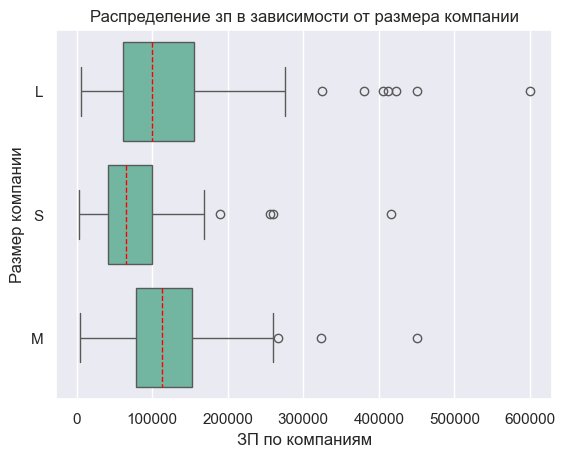

In [42]:
# company_size
ax = sns.boxplot(data, x='salary_in_usd', y='company_size', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='ЗП по компаниям', ylabel='Размер компании')
plt.title('Распределение зп в зависимости от размера компании')
plt.show()

In [43]:
data_company_size_agg=data.groupby('company_size')["salary_in_usd"].describe().round(1)
print("Распределение зп в зависимости от размера компании")
data_company_size_agg.sort_values(by="count", ascending=False)

Распределение зп в зависимости от размера компании


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
M,326.0,116905.5,59287.7,4000.0,78131.5,113188.0,152875.0,450000.0
L,198.0,119243.0,86156.7,5882.0,61041.8,100000.0,154600.0,600000.0
S,83.0,77632.7,63461.7,2859.0,41943.0,65000.0,100000.0,416000.0


In [44]:
# ну и снова приведем зп к знаменателю x/1000
data_company_size_1k=data.copy()
data_company_size_1k['salary_in_usd']=data["salary_in_usd"].apply(lambda x:x/1000)
data_company_size_1k

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79.833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260.000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109.024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20.000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150.000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154.000,US,100,US,M
603,2022,SE,FT,Data Engineer,126.000,US,100,US,M
604,2022,SE,FT,Data Analyst,129.000,US,0,US,M
605,2022,SE,FT,Data Analyst,150.000,US,100,US,M


[Text(0.5, 44.249999999999986, 'Год'), Text(54.75, 0.5, 'Размер компании')]

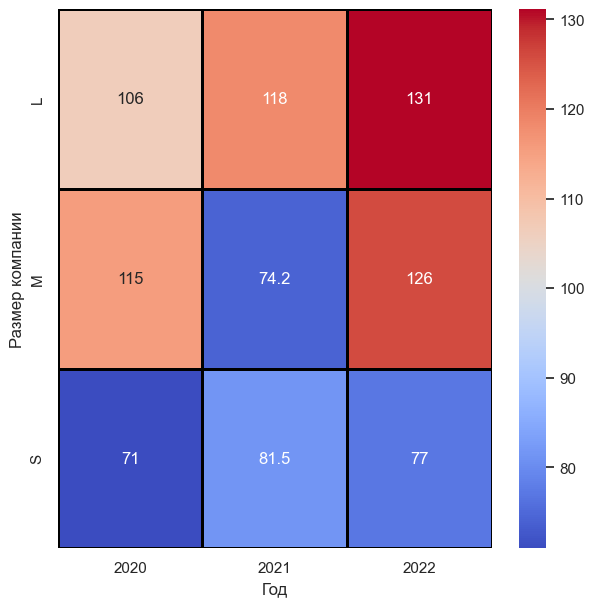

In [45]:
# телловая карта для признака по размеру компании, ЗП уже приведена к знаменателю x/1000
data_heatmap_company_size=pd.pivot_table(data_company_size_1k, values='salary_in_usd', index='company_size', columns='work_year')
fig, ax=plt.subplots(figsize=(7,7))
ax=sns.heatmap(data_heatmap_company_size, linewidths=1, linecolor='black', annot=True, fmt="-.3g", cmap='coolwarm')
ax.set(xlabel="Год", ylabel="Размер компании")

вывод: выбросы присутствуют по всем группам. ЗП в S-компаниях с течением времени не менялась, какой-то непонятный провал виден по M-компаниям, ну и значительный рост за по L-компаниям